##  1. Введение

 1.1 Описание набора данных: 
 
 
В наборе данных представлено 17 клинических характеристик для прогнозирования состояния выживания пациентов с циррозом печени. Состояния выживания включают  0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation). Цирроз является результатом длительного повреждения печени, часто из-за таких состояний, как гепатит или хроническое употребление алкоголя. Данные получены из исследованияMayo Clinic по первичному билиарному циррозу (ПБЦ) печени, проведенного с 1974 по 1984 год. Описание исходных данных: С 1974 по 1984 год, 424 пациента с ПБЦ, направленных в Mayo Clinic, соответствовали критериям для участия в рандомизированном плацебо-контролируемом испытании препарата D-пеницилламин. Из них первые 312 пациентов приняли участие в испытании и имеют в основном полные данные. Оставшиеся 112 пациентов не присоединились к клиническому испытанию, но согласились регистрировать основные показатели и проходить отслеживание выживаемости. Шесть из этих пациентов вскоре стали недоступны для отслеживания после постановки диагноза, оставив данные для 106 из этих лиц, в дополнение к 312, которые были частью рандомизированного испытания.

Attributes Description:

ID - unique identifier

N_Days - number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

Status - status of patient [C (censored), CL (censored due to liver tx), D (death)]

Drug - type of drug D-penicillamine or placebo

Age - age (in days)

Sex - M (male), F (female)

Ascites - presence of ascites N (No), Y (Yes)

Hepatomegaly - presence of hepatomegaly N (No), Y (Yes)

Spiders - presence of spiders N (No), Y (Yes)

Edema - presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), Y (edema despite diuretic therapy)

Bilirubin - serum bilirubin (mg/dL)

Cholesterol - serum cholesterol (mg/dL)

Albumin - albumin (gm/dL)

Copper - urine copper (ug/day)

Alk_Phos - alkaline phosphatase (U/liter)

SGOT - SGOT (U/mL)

Triglycerides - triglycerides

Platelets - platelets per cubic (mL/1000)

Prothrombin - prothrombin time (sec)

Stage - histologic stage of disease (1,2,3 or 4)


### 1.2  Загрузка необходимых библиотек и датасета

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import datetime as dt
import json
import os
import random

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")
sns.set()

In [4]:
! pip install opendatasets
import  opendatasets as od

In [5]:
od.download('https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction')

Skipping, found downloaded files in ".\cirrhosis-patient-survival-prediction" (use force=True to force download)


In [6]:
os.listdir()

['.ipynb_checkpoints',
 'cardiovascular-disease-dataset',
 'cirrhosis-patient-survival-prediction',
 'cirrhosis-patient-survival-prediction.zip',
 'cirrhosis.csv',
 'cirrhosis_patient_survival_prediction.ipynb',
 'dish-network-hackathon',
 'kaggle datasets download -d joebeachcapital',
 'Untitled.ipynb',
 'Untitled1.ipynb']

## 2. Понимание и очистка данных

In [3]:
data = pd.read_csv('cirrhosis-patient-survival-prediction/cirrhosis.csv', index_col='ID')
data.head(10)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.50,261.00,2.60,156.00,1718.00,137.95,172.00,190.00,12.20,4.00
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.10,302.00,4.14,54.00,7394.80,113.52,88.00,221.00,10.60,3.00
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.40,176.00,3.48,210.00,516.00,96.10,55.00,151.00,12.00,4.00
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.80,244.00,2.54,64.00,6121.80,60.63,92.00,183.00,10.30,4.00
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.40,279.00,3.53,143.00,671.00,113.15,72.00,136.00,10.90,3.00
6,2503,D,Placebo,24201,F,N,Y,N,N,0.80,248.00,3.98,50.00,944.00,93.00,63.00,NaN,11.00,3.00
7,1832,C,Placebo,20284,F,N,Y,N,N,1.00,322.00,4.09,52.00,824.00,60.45,213.00,204.00,9.70,3.00
8,2466,D,Placebo,19379,F,N,N,N,N,0.30,280.00,4.00,52.00,4651.20,28.38,189.00,373.00,11.00,3.00
9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.20,562.00,3.08,79.00,2276.00,144.15,88.00,251.00,11.00,2.00


In [4]:
# типы данных и информация по каждому столбцу
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

In [5]:
#  Количество пропущенных значений в каждом столбце
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_df = pd.DataFrame(missing_values, columns=['Number of Missing Values'])

print(missing_values_df)


               Number of Missing Values
Tryglicerides                       136
Cholesterol                         134
Copper                              108
Drug                                106
Ascites                             106
Hepatomegaly                        106
Spiders                             106
Alk_Phos                            106
SGOT                                106
Platelets                            11
Stage                                 6
Prothrombin                           2


In [6]:
# Создаем копию датафрейма для дальнейшей корректной работы с данными и заполняем пропуски в количественных данных средним
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy="mean")

df = data.copy()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num.fit(df[numeric_columns])
df[numeric_columns] = imputer_num.transform(df[numeric_columns])
print(df.shape)

(418, 19)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    float64
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    float64
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    float64
 17  Prothrombin    418 non-null    float64
 18  Stage          

In [8]:
# Для удобства приведем название столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['n_days', 'status', 'drug', 'age', 'sex', 'ascites', 'hepatomegaly',
       'spiders', 'edema', 'bilirubin', 'cholesterol', 'albumin', 'copper',
       'alk_phos', 'sgot', 'tryglicerides', 'platelets', 'prothrombin',
       'stage'],
      dtype='object')

In [9]:
# Удаление строк, где значения в столбце 'Drug' отсутствуют (null)
df = df[df['drug'].notnull()]

# Вывод размерности итогового датафрейма
print(df.shape)

(312, 19)


#### Проверка на наличие дубликатов в данных

In [10]:
df.duplicated().sum() 

0

#### Посмотрим на типы данных для каждого признака

In [11]:
print("Data Types:")
print(df.dtypes)

Data Types:
n_days           float64
status            object
drug              object
age              float64
sex               object
ascites           object
hepatomegaly      object
spiders           object
edema             object
bilirubin        float64
cholesterol      float64
albumin          float64
copper           float64
alk_phos         float64
sgot             float64
tryglicerides    float64
platelets        float64
prothrombin      float64
stage            float64
dtype: object


#### Посмотрим на количество уникальных значений для каждого признака

In [12]:
print("\nNumber of Unique Values for Each Column:")
print(df.nunique())


Number of Unique Values for Each Column:
n_days           301
status             3
drug               2
age              308
sex                2
ascites            2
hepatomegaly       2
spiders            2
edema              3
bilirubin         85
cholesterol      202
albumin          135
copper           159
alk_phos         295
sgot             179
tryglicerides    147
platelets        211
prothrombin       44
stage              4
dtype: int64


## 3. Понимание признаков

## Таргет(целевая переменная)

In [25]:
df["status"].value_counts()

status
C     168
D     125
CL     19
Name: count, dtype: int64

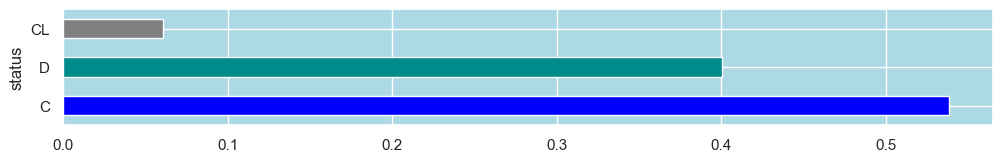

,Number,Percent
status,,
C,168,53.85
D,125,40.06
CL,19,6.09


In [13]:
# Установка цвета фона для графика
plt.gca().set_facecolor('lightblue')

# Построение горизонтальной столбчатой диаграммы для столбца 'status'
df['status'].value_counts(normalize=True).plot(kind='barh', figsize=(12, 1.5), color=['blue', 'darkcyan', 'grey'])

# Показать график
plt.show()


# Создание DataFrame с подсчётом уникальных значений и их процентным соотношением в столбце 'Status' датафрейма df
df_summary = pd.DataFrame(data= {
    'Number' : df['status'].value_counts(), 
    'Percent': df['status'].value_counts(normalize=True) * 100
})

df_summary

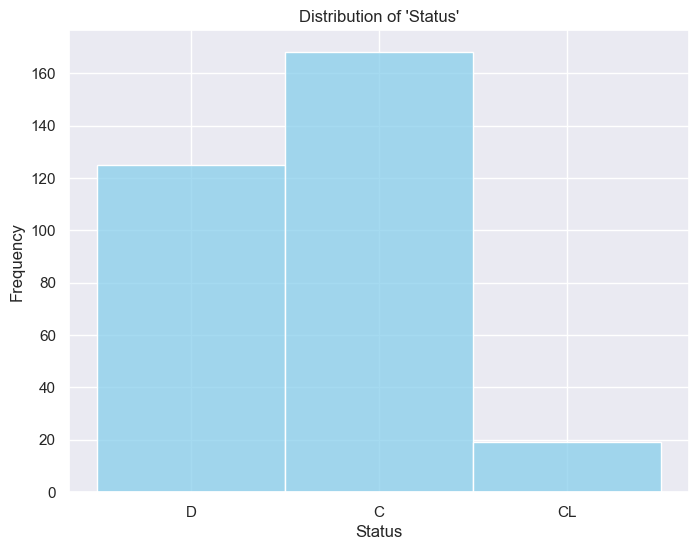

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['status'], color='skyblue')  
plt.title("Distribution of 'Status'")
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()


## Признаки: категориальные и количественные

In [16]:
features = [f for f in df.columns.tolist() if f !='status']
len(features)

18

In [17]:
# категориальные признаки
cat_features = [f for f in features if df[f].dtype==object or f=='stage']
cat_features, len(cat_features) 

(['drug', 'sex', 'ascites', 'hepatomegaly', 'spiders', 'edema', 'stage'], 7)

In [18]:
# количественные признаки
num_features = [f for f in features if f not in cat_features]
num_features, len(num_features)

(['n_days',
  'age',
  'bilirubin',
  'cholesterol',
  'albumin',
  'copper',
  'alk_phos',
  'sgot',
  'tryglicerides',
  'platelets',
  'prothrombin'],
 11)

### Univariate Analysis: количественные признаки

### Feature N_Days
Количество дней между регистрацией и более ранним событием из следующих: смерть, трансплантация или время анализа исследования в июле 1986 года

In [19]:
# описательные статистики
df['n_days'].describe()

count    312.00
mean    2006.36
std     1123.28
min       41.00
25%     1191.00
50%     1839.50
75%     2697.25
max     4556.00
Name: n_days, dtype: float64

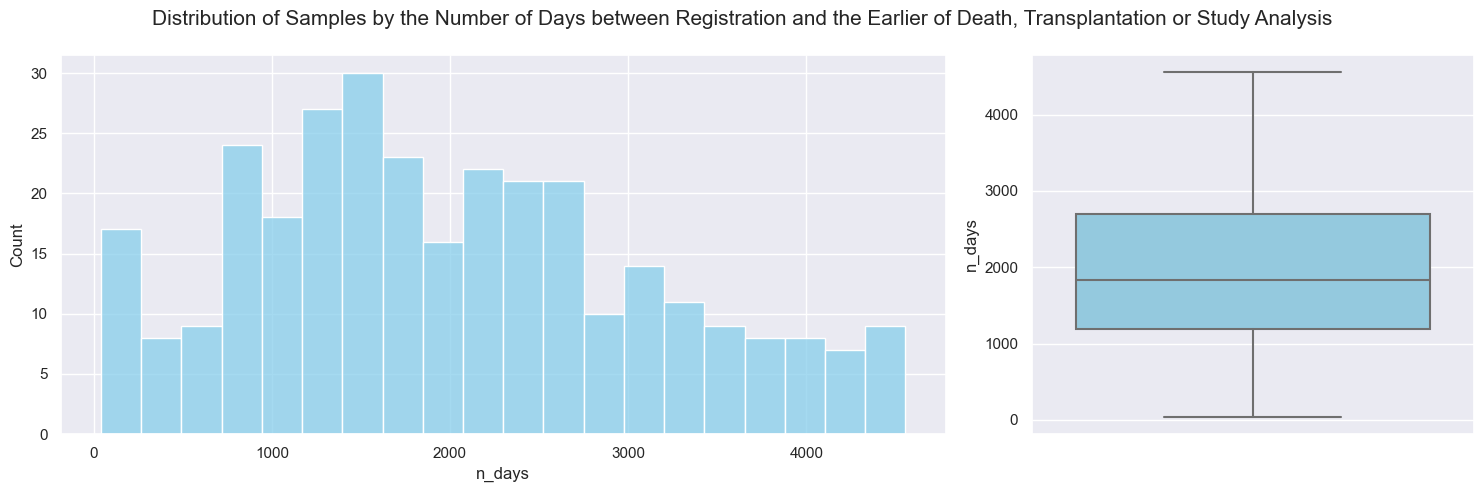

In [75]:
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['n_days'],bins=20, color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['n_days'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of Samples by the Number of Days between Registration and the Earlier of Death, Transplantation or Study Analysis', fontsize=15)
plt.tight_layout()
plt.show()

In [39]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['n_days'].quantile(0.25)  # 25-й процентиль
Q3 = df['n_days'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-1068.375, 4956.625)

### Feature Age

In [34]:
# переведем возраст в число лет
df['age'] = df['age'] / 365

In [35]:
df['age'].describe()

count   312.00
mean     50.05
std      10.59
min      26.30
25%      42.27
50%      49.83
75%      56.75
max      78.49
Name: age, dtype: float64

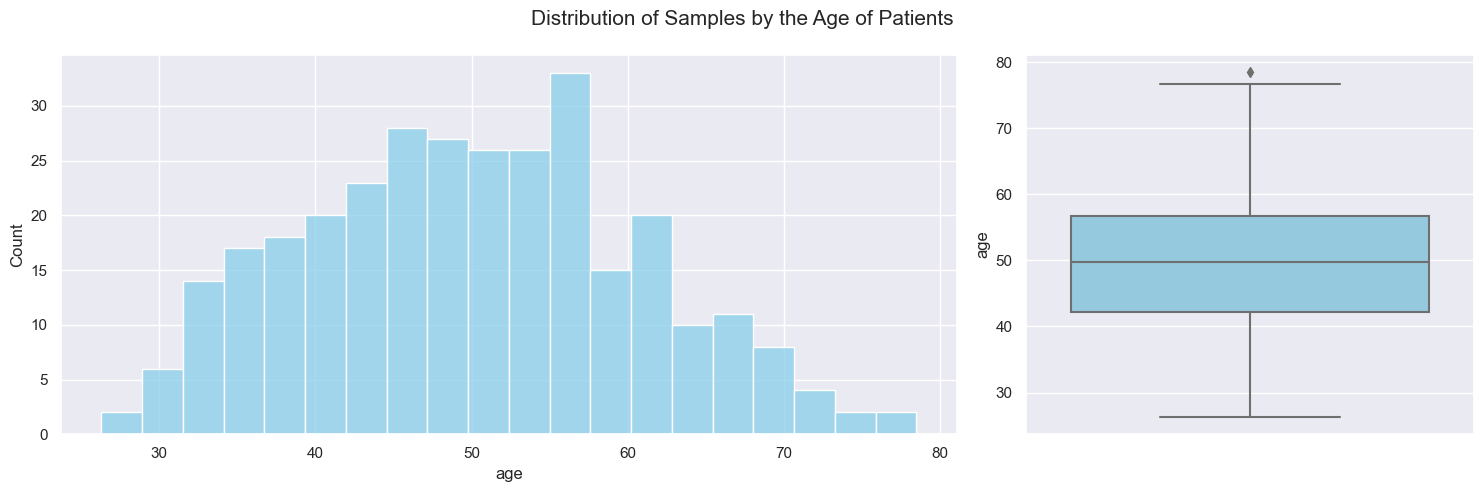

In [74]:
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['age'],bins = 20, color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['age'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of Samples by the Age of Patients', fontsize=15)
plt.tight_layout()
plt.show()

In [38]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['age'].quantile(0.25)  # 25-й процентиль
Q3 = df['age'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(20.539383561643827, 78.4818493150685)

### Feature Bilirubin
Сывороточный билирубин (mg/dL) - нормальный уровень сывороточного билирубина в крови варьируется, но в общем случае для взрослых он составляет от 0.1 до 1.2 mg/dL

В контексте цирроза печени высокий уровень билирубина является обычным явлением, так как цирроз может значительно нарушить способность печени обрабатывать билирубин. Поэтому в таких случаях лабораторные значения билирубина, которые значительно превышают общепринятые нормы, не всегда следует рассматривать как статистические выбросы в данных. Вместо этого, эти значения могут отражать реальное клиническое состояние пациентов с циррозом, и их следует анализировать с учетом контекста заболевания.

In [40]:
df['bilirubin'].describe()

count   312.00
mean      3.26
std       4.53
min       0.30
25%       0.80
50%       1.35
75%       3.42
max      28.00
Name: bilirubin, dtype: float64

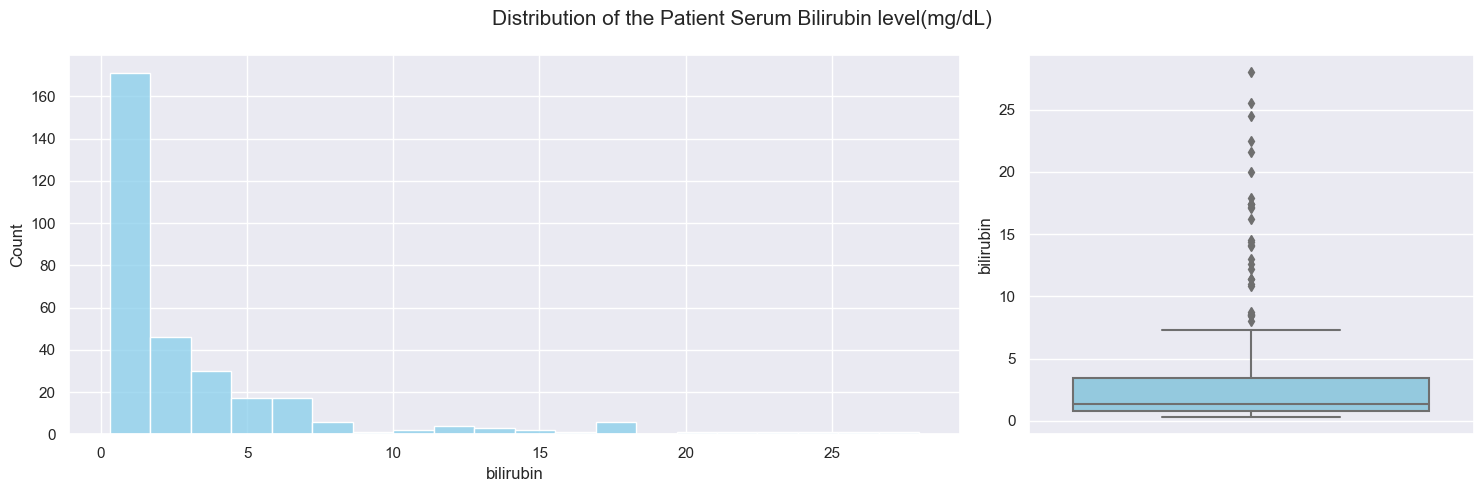

In [73]:
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['bilirubin'], bins=20, color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['bilirubin'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of the Patient Serum Bilirubin level(mg/dL)', fontsize=15)
plt.tight_layout()
plt.show()

In [42]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['bilirubin'].quantile(0.25)  # 25-й процентиль
Q3 = df['bilirubin'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-3.1375, 7.3625)

### Feature Cholesterol
Serum cholesterol (mg/dL) - для взрослых нормальные показатели уровня общего холестерина составляют от 125 до 200 мг/дл.

В контексте цирроза печени, уровни холестерина в сыворотке крови могут изменяться по-разному, изменения уровней холестерина может зависеть от тяжести и причины цирроза, включая алкогольное или неалкогольное происхождение заболевания. Таким образом, при оценке уровней холестерина у пациентов с циррозом печени важно учитывать индивидуальные аспекты каждого случая.

In [43]:
df['cholesterol'].describe()

count    312.00
mean     369.51
std      221.26
min      120.00
25%      255.75
50%      322.00
75%      392.25
max     1775.00
Name: cholesterol, dtype: float64

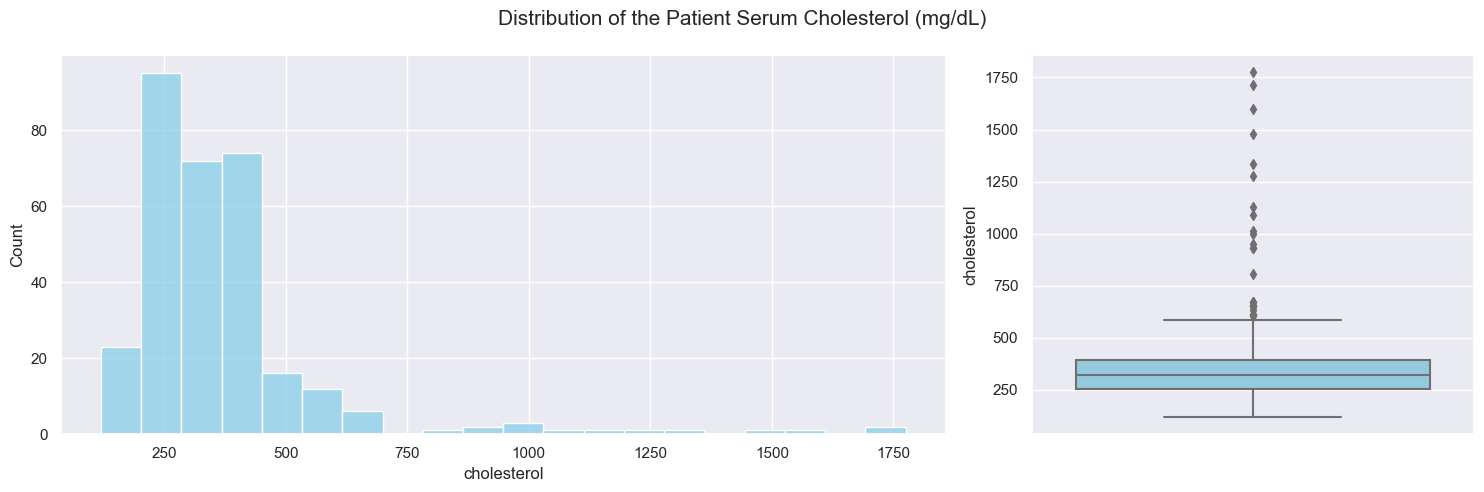

In [72]:
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['cholesterol'], bins=20, color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['cholesterol'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of the Patient Serum Cholesterol (mg/dL)', fontsize=15)
plt.tight_layout()
plt.show()

In [45]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['cholesterol'].quantile(0.25)  # 25-й процентиль
Q3 = df['cholesterol'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(51.0, 597.0)

### Feature Albumin
Albumin (gm/dL) - Нормальный уровень альбумина в сыворотке крови варьируется от 3.4 до 5.4 граммов на децилитр (gm/dL). Этот показатель может различаться в зависимости от методов измерения и используемых лабораторных стандартов.

При циррозе печени уровень альбумина в сыворотке крови часто снижается. Это связано с тем, что альбумин производится в печени, и при заболеваниях печени, таких как цирроз, её способность синтезировать альбумин уменьшается. Кроме того, у пациентов с циррозом часто наблюдаются нарушения питания, которые также могут влиять на уровни альбумина. Снижение уровня альбумина может быть признаком продвинутой стадии цирроза и указывать на нарушение функции печени.

In [46]:
df['albumin'].describe()

count   312.00
mean      3.52
std       0.42
min       1.96
25%       3.31
50%       3.55
75%       3.80
max       4.64
Name: albumin, dtype: float64

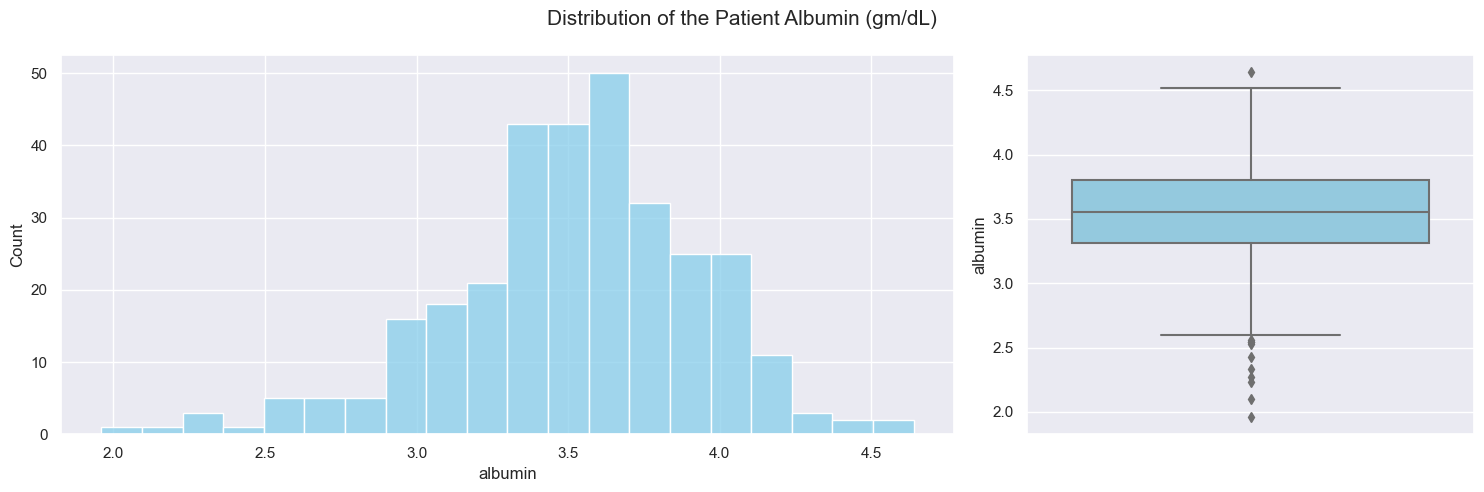

In [71]:
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['albumin'], bins=20, color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['albumin'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of the Patient Albumin (gm/dL)', fontsize=15)
plt.tight_layout()
plt.show()

In [48]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['albumin'].quantile(0.25)  # 25-й процентиль
Q3 = df['albumin'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(2.575, 4.534999999999999)

### Feature Copper
Urine copper (ug/day - нормальный уровень меди в моче обычно составляет от 20 до 50 микрограммов (мкг) в сутки. Однако эти значения могут варьироваться в зависимости от методов анализа и лабораторных стандартов.
При циррозе печени уровни меди в моче могут изменяться,цирроз может привести к накоплению меди в печени, что иногда вызывает её повышенное выведение с мочой. Таким образом, при интерпретации уровней меди в моче у пациентов с циррозом печени важно учитывать общий клинический контекст, включая наличие других признаков и симптомов, а также результаты дополнительных исследований.

In [49]:
df['copper'].describe()

count   312.00
mean     97.65
std      85.34
min       4.00
25%      41.75
50%      73.00
75%     123.00
max     588.00
Name: copper, dtype: float64

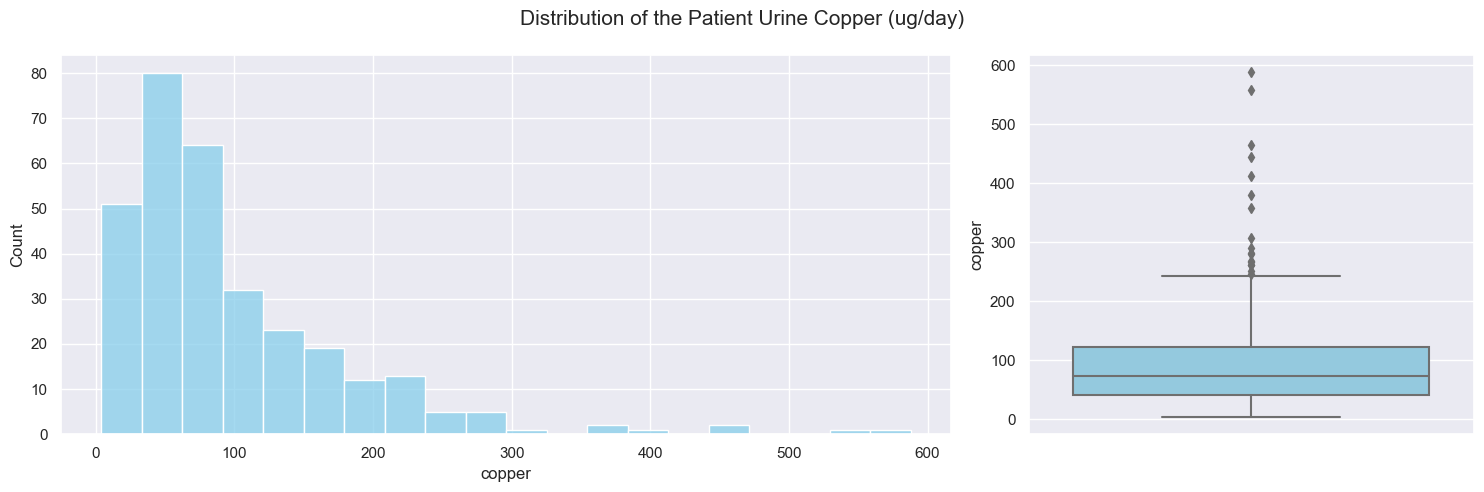

In [55]:
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['copper'], bins=20, color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['copper'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of the Patient Urine Copper (ug/day)', fontsize=15)
plt.tight_layout()
plt.show()

In [51]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['copper'].quantile(0.25)  # 25-й процентиль
Q3 = df['copper'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-80.125, 244.875)

### Alk_Phos
Alkaline phosphatase (U/liter) - нормальные значения щелочной фосфатазы в крови обычно находятся в диапазоне от 44 до 147 единиц на литр (U/L), хотя нормы могут варьироваться в зависимости от возраста, пола и методов измерения, используемых в конкретной лаборатории.

При циррозе печени уровень щелочной фосфатазы в крови часто повышается. Это связано с тем, что щелочная фосфатаза вырабатывается в печени, и повышение её уровня может указывать на нарушение функции печени, характерное для цирроза. Особенно значительное повышение уровней щелочной фосфатазы может наблюдаться при холестатических состояниях, когда отток желчи из печени затруднен, что часто бывает при циррозе. Таким образом, повышенные уровни щелочной фосфатазы могут быть одним из лабораторных признаков цирроза печени, но важно учитывать, что они также могут наблюдаться при других заболеваниях печени и желчевыводящих путей. Всегда необходимо анализировать лабораторные показатели в контексте общей клинической картины.

In [52]:
df['alk_phos'].describe()

count     312.00
mean     1982.66
std      2140.39
min       289.00
25%       871.50
50%      1259.00
75%      1980.00
max     13862.40
Name: alk_phos, dtype: float64

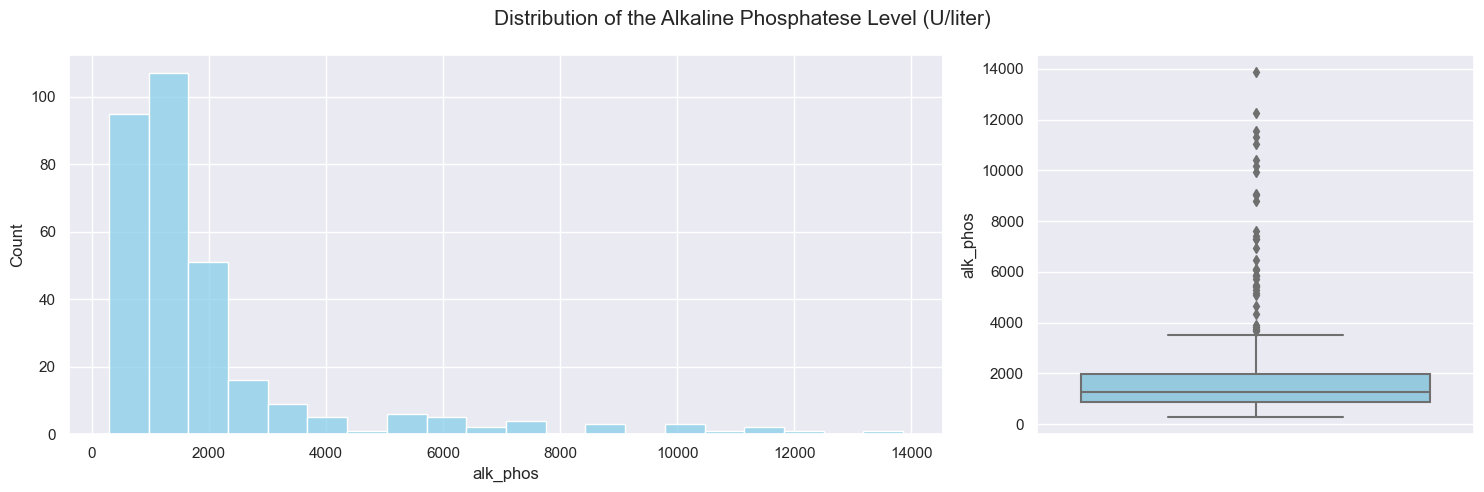

In [54]:
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['alk_phos'], bins=20, color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['alk_phos'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of the Alkaline Phosphatese Level (U/liter)', fontsize=15)
plt.tight_layout()
plt.show()

In [56]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['alk_phos'].quantile(0.25)  # 25-й процентиль
Q3 = df['alk_phos'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-791.25, 3642.75)

### Feature SGOT
Serum Glutamic-Oxaloacetic Transaminase (aka aspartate aminotransferase - AST). SGOT (U/mL) - Нормальные значения сывороточной глутамат-оксалоацетат трансаминазы (SGOT), также известной как аспартатаминотрансфераза (AST), обычно находятся в диапазоне от 10 до 40 единиц на миллилитр (U/mL), хотя эти значения могут варьироваться в зависимости от пола, возраста и методов измерения, используемых в конкретной лаборатории.

При циррозе печени уровни SGOT/AST в крови часто повышаются. Это связано с тем, что цирроз приводит к повреждению клеток печени, в результате чего SGOT/AST, которая нормально находится внутри клеток, высвобождается в кровоток. Однако повышенные уровни SGOT/AST не являются специфическими только для цирроза и могут наблюдаться при других заболеваниях печени, таких как гепатит, а также при повреждениях других органов, включая сердце и мышцы.

In [57]:
df['sgot'].describe()

count   312.00
mean    122.56
std      56.70
min      26.35
25%      80.60
50%     114.70
75%     151.90
max     457.25
Name: sgot, dtype: float64

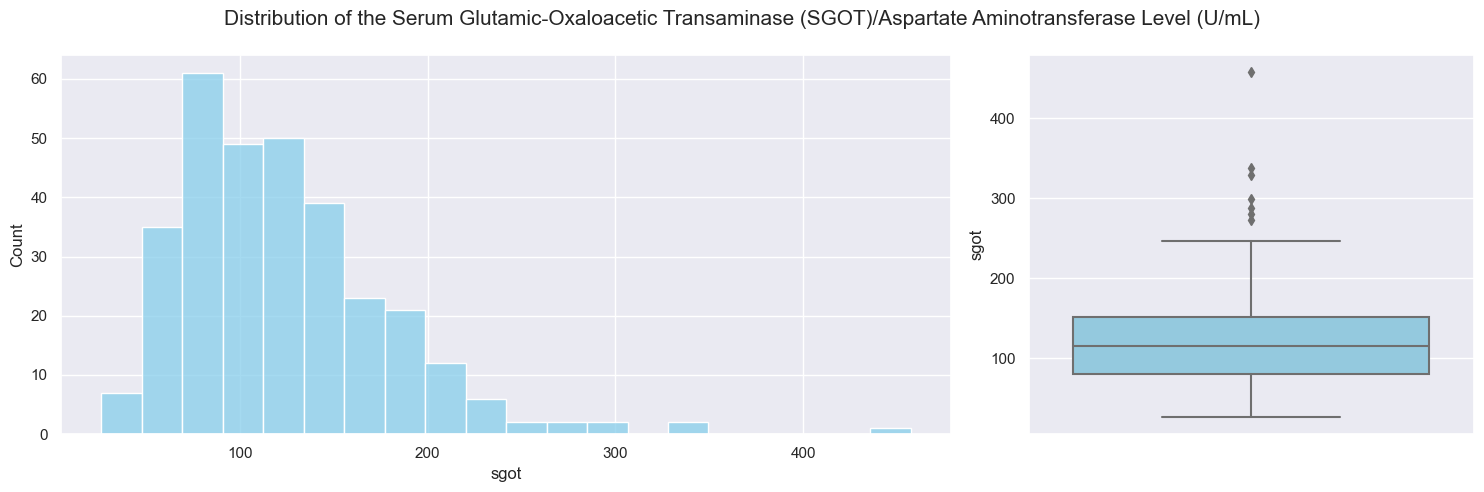

In [59]:
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['sgot'], bins=20, color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['sgot'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of the Serum Glutamic-Oxaloacetic Transaminase (SGOT)/Aspartate Aminotransferase Level (U/mL)', fontsize=15)
plt.tight_layout()
plt.show()

In [60]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['sgot'].quantile(0.25)  # 25-й процентиль
Q3 = df['sgot'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-26.350000000000023, 258.85)

### Feature Tryglicerides
Triglycerides - единицы измерения в описании к датасету не представлены

Цирроз может приводить к нарушению метаболизма жиров, что иногда проявляется изменениями уровней триглицеридов в крови. Например, при алкогольном циррозе печени часто наблюдаются повышенные уровни триглицеридов. Однако в случаях цирроза, вызванного другими причинами, такими как вирусные гепатиты или неалкогольная жировая болезнь печени, уровни триглицеридов могут оставаться в норме или даже снижаться.

In [61]:
df['tryglicerides'].describe()

count   312.00
mean    124.70
std      61.93
min      33.00
25%      87.00
50%     114.00
75%     145.25
max     598.00
Name: tryglicerides, dtype: float64

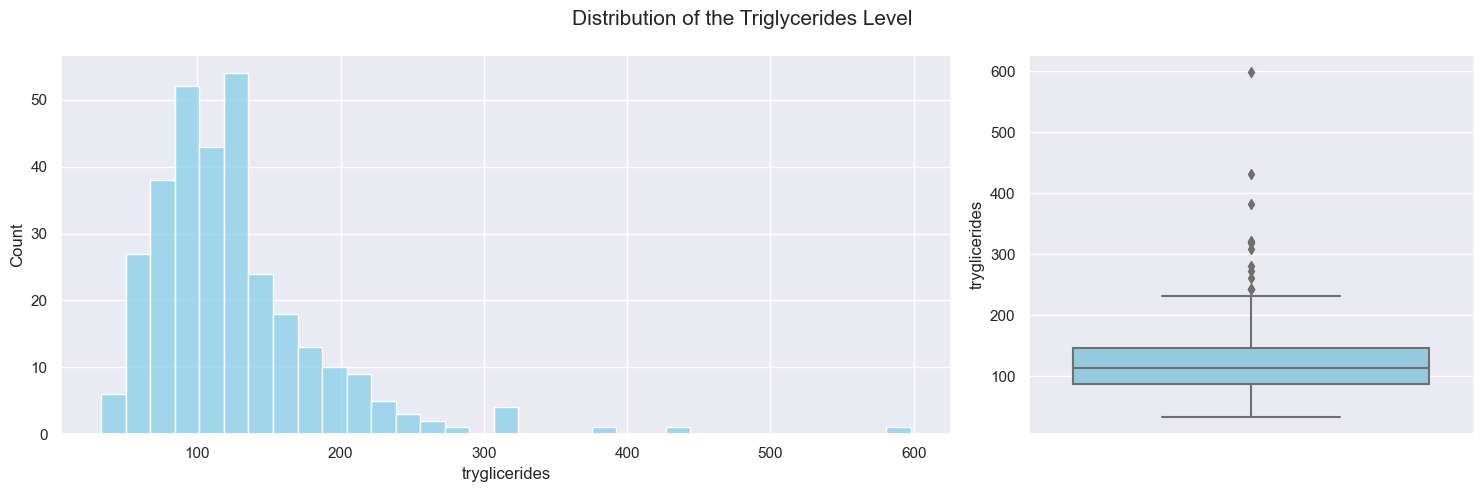

In [65]:
#visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['tryglicerides'], color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['tryglicerides'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of the Triglycerides Level', fontsize=15)
plt.tight_layout()
plt.show()

In [66]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['tryglicerides'].quantile(0.25)  # 25-й процентиль
Q3 = df['tryglicerides'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-0.375, 232.625)

### Feature Platelets
Platelets per cubic (mL/1000) - нормальный уровень тромбоцитов в крови для взрослых обычно находится в диапазоне 150-450 x 10^9/литр. Эти значения могут незначительно варьироваться в зависимости от методов измерения и используемых лабораторных стандартов.

In [67]:
df['platelets'].describe()

count   312.00
mean    261.87
std      94.99
min      62.00
25%     200.00
50%     257.02
75%     322.00
max     563.00
Name: platelets, dtype: float64

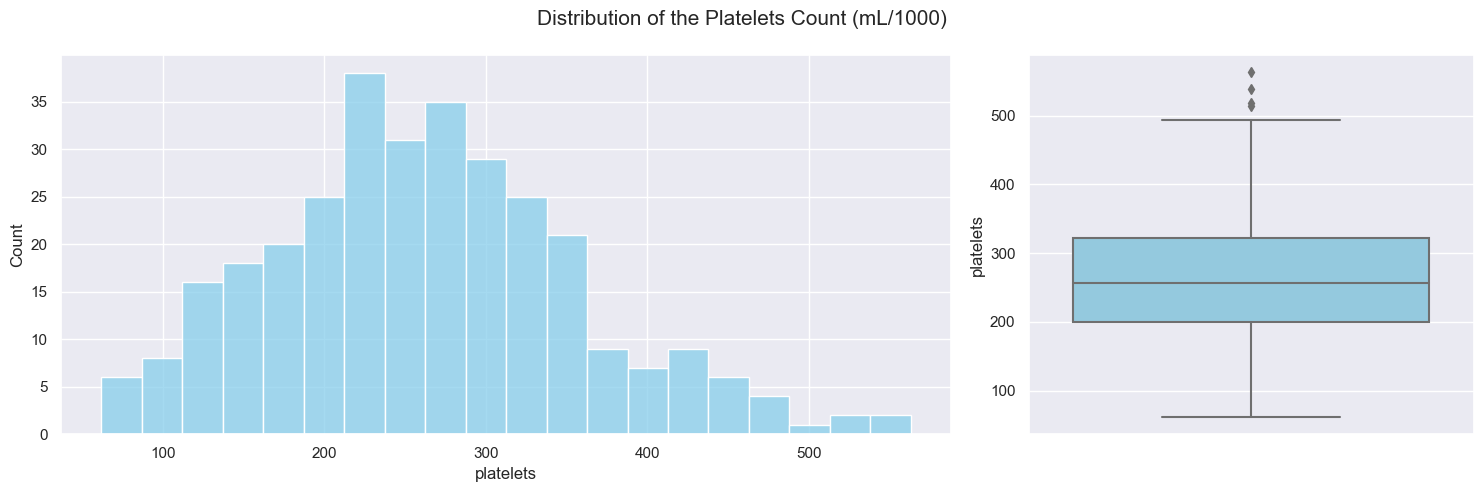

In [69]:
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['platelets'],bins = 20, color='skyblue', ax=axes[0])
sns.boxplot(data=df, y=df['platelets'], color='skyblue', ax=axes[1])
figure.suptitle('Distribution of the Platelets Count (mL/1000)', fontsize=15)
plt.tight_layout()
plt.show()

In [70]:
# Расчет IQR и границ для выбросов

# Значения процентилей из описания данных
Q1 = df['platelets'].quantile(0.25)  # 25-й процентиль
Q3 = df['platelets'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Межквартильный размах

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(17.0, 505.0)

### Полученные на основании univariate analysis выводы для количественных признаков:

1. N_Days, Age: Оба признака показывают широкий диапазон значений и относительно равномерное распределение.
2. Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin: Эти признаки имеют распределение с правосторонней асимметрией, что указывает на наличие выбросов с очень высокими значениями.
3. Albumin: вероятно нормальное распределение по сравнению с другими признаками.
4. При анализе количественных признаков регистрируется большое количество выбросов практически в каждом признаке с лабораторными данными, однако учитывая, что это реальные пациенты и реальные результаты клинико-лабораторных исследований, а также , что при наличии и прогрессировании заболевания лабораторные показатели могут значительно отличаться от вариантов нормы, то удаление значений, являющихся выбросами нецелесообразно и их необходимо учитывать для дальнейшего исследования.

###  Univariate Analysis : категориальные признаки

###  Feature Drug
Type of drug D-penicillamine or placebo - использование препарата D-penicillamine или плацебо

In [76]:
df['drug'].value_counts()

drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

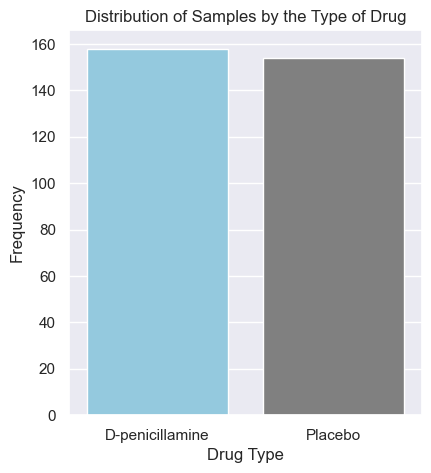

In [77]:
drug_counts = df['drug'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=drug_counts.index, y=drug_counts.values, palette=['skyblue', 'gray'])
plt.title('Distribution of Samples by the Type of Drug')
plt.xlabel('Drug Type')
plt.ylabel('Frequency')

plt.show()

###  Feature Sex
M (male), F (female) - пол мужской, женский

In [78]:
df['sex'].value_counts()

sex
F    276
M     36
Name: count, dtype: int64

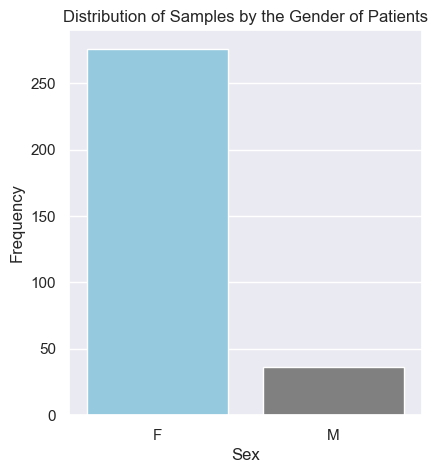

In [79]:
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=['skyblue', 'gray'])
plt.title('Distribution of Samples by the Gender of Patients')
plt.xlabel('Sex')
plt.ylabel('Frequency')

plt.show()

###  Feature Ascites
Ascites is a buildup of fluid in your abdomen. Presence of ascites N (No), Y (Yes) - наличие или отсутствия жидкости(асцита) в брюшной полости

In [80]:
df['ascites'].value_counts()

ascites
N    288
Y     24
Name: count, dtype: int64

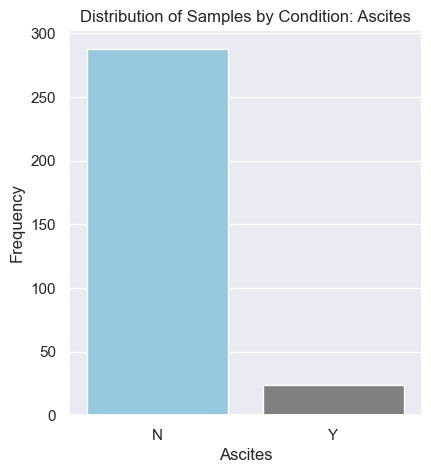

In [81]:
ascites = df['ascites'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=ascites.index, y=ascites.values, palette=['skyblue', 'gray'])
plt.title('Distribution of Samples by Condition: Ascites')
plt.xlabel('Ascites')
plt.ylabel('Frequency')

plt.show()

### Feature Hepatomegaly
Hepatomegaly is enlargement of the liver beyond its normal size. Presence of hepatomegaly N (No), Y (Yes) - наличие или отсутствие гепатомегалии(увеличения размеров печени)

In [82]:
df['hepatomegaly'].value_counts()

hepatomegaly
Y    160
N    152
Name: count, dtype: int64

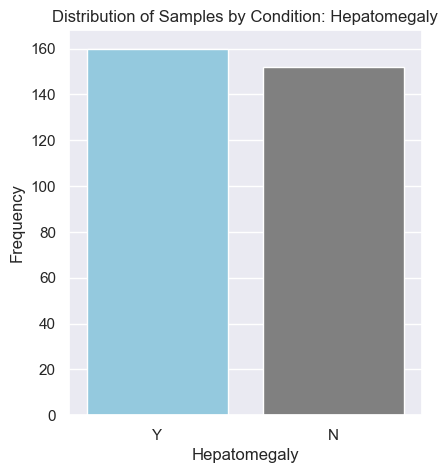

In [83]:
hepatomegaly = df['hepatomegaly'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=hepatomegaly.index, y=hepatomegaly.values, palette=['skyblue', 'gray'])
plt.title('Distribution of Samples by Condition: Hepatomegaly')
plt.xlabel('Hepatomegaly')
plt.ylabel('Frequency')

plt.show()

### Feature Spiders
Spider angiomas - a common presentation of liver cirrhosis. Наличие или отсутствие spiders angiomas N (No), Y (Yes).

Паукообразные ангиомы (spider angiomas) — это небольшие, расширенные кровеносные сосуды на поверхности кожи, которые обычно имеют центральную точку с расходящимися от неё мелкими сосудами, напоминающими паутину или ноги паука. Они могут быть красными, синюшными или фиолетовыми и чаще всего появляются на лице, шее, верхней части груди и руках.
Паукообразные ангиомы часто встречаются у здоровых людей, особенно у детей и беременных женщин, но их появление также может быть связано с определёнными заболеваниями, такими как цирроз печени.

In [84]:
df['spiders'].value_counts()

spiders
N    222
Y     90
Name: count, dtype: int64

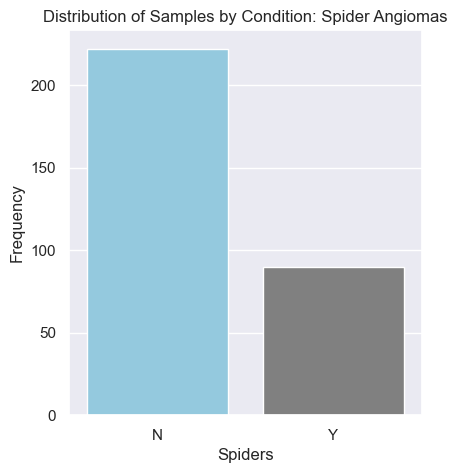

In [85]:
spiders = df['spiders'].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=spiders.index, y=spiders.values, palette=['skyblue', 'gray'])
plt.title('Distribution of Samples by Condition: Spider Angiomas')
plt.xlabel('Spiders')
plt.ylabel('Frequency')

plt.show()

### Feature Edema
Presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), Y (edema despite diuretic therapy)

Наличие или отсутствие отеков в сочетании с использованием или нет диуретиков.

In [86]:
df['edema'].value_counts()

edema
N    263
S     29
Y     20
Name: count, dtype: int64

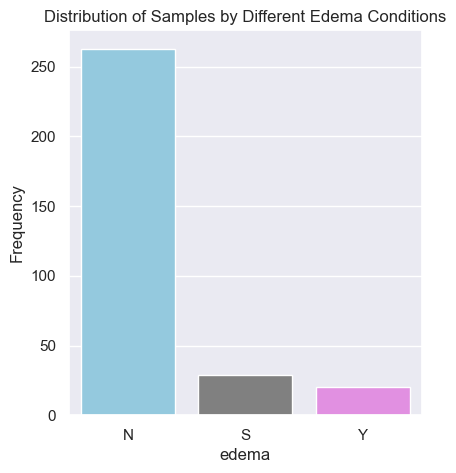

In [87]:
edema = df['edema'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=edema.index, y=edema.values, palette=['skyblue', 'gray', 'violet'])
plt.title('Distribution of Samples by Different Edema Conditions')
plt.xlabel('edema')
plt.ylabel('Frequency')

plt.show()

### Feature Stage
Histologic stage of disease (1,2,3 or 4)

Гистологическая стадия заболевания  описывает степень тяжести заболевания от наименее тяжелой(1) до тяжелой (4)

In [22]:
df['stage'].value_counts()

stage
3.00    120
4.00    109
2.00     67
1.00     16
Name: count, dtype: int64

In [23]:
df['stage'] = df['stage'].astype('str')

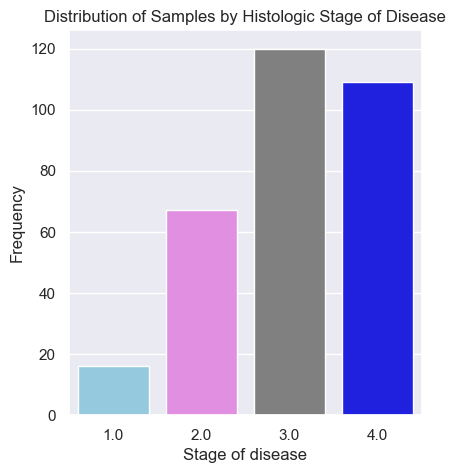

In [24]:
stage = df['stage'].value_counts().sort_index()
colors = ['skyblue','violet','orange','lightgreen']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=stage.index, y=stage.values, palette=['skyblue','violet','grey','blue'])
plt.title('Distribution of Samples by Histologic Stage of Disease')
plt.xlabel('Stage of disease')
plt.ylabel('Frequency')

plt.show()

### Полученные на основании univariate analysis выводы для категориальных признаков:

1. Stage:  Существует четыре уникальных значения. Наиболее часто встречаются тяжелые стадии заболевания 3 и 4 .
2. Drug: Зарегистрированы два уникальных значения - это использование лекарственного препарата D-пеницилламин либо плацебо, причём 'D-пеницилламин' встречается чаще.
3. Sex: Большинство записей в датасете относятся к женскому полу
4. Ascites, Hepatomegaly, Spiders, Edema: Эти признаки имеют две или три категории, причём одна категория значительно чаще встречается, чем другие.

## Bivariate Analysis:

### 1. Correlation matrix для количественных признаков:

In [92]:
df_corr = df[num_features].corr().transpose()
df_corr

,n_days,age,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin
n_days,1.00,-0.13,-0.44,-0.13,0.44,-0.36,0.15,-0.23,-0.14,0.19,-0.17
age,-0.13,1.00,0.04,-0.15,-0.20,0.06,-0.05,-0.15,0.02,-0.14,0.20
bilirubin,-0.44,0.04,1.00,0.38,-0.33,0.46,0.12,0.44,0.42,-0.09,0.36
cholesterol,-0.13,-0.15,0.38,1.00,-0.06,0.12,0.14,0.34,0.28,0.18,-0.03
albumin,0.44,-0.20,-0.33,-0.06,1.00,-0.26,-0.10,-0.22,-0.09,0.20,-0.23
copper,-0.36,0.06,0.46,0.12,-0.26,1.00,0.19,0.29,0.27,-0.06,0.22
alk_phos,0.15,-0.05,0.12,0.14,-0.10,0.19,1.00,0.11,0.17,0.14,0.09
sgot,-0.23,-0.15,0.44,0.34,-0.22,0.29,0.11,1.00,0.12,-0.12,0.11
tryglicerides,-0.14,0.02,0.42,0.28,-0.09,0.27,0.17,0.12,1.00,0.09,0.02
platelets,0.19,-0.14,-0.09,0.18,0.20,-0.06,0.14,-0.12,0.09,1.00,-0.22


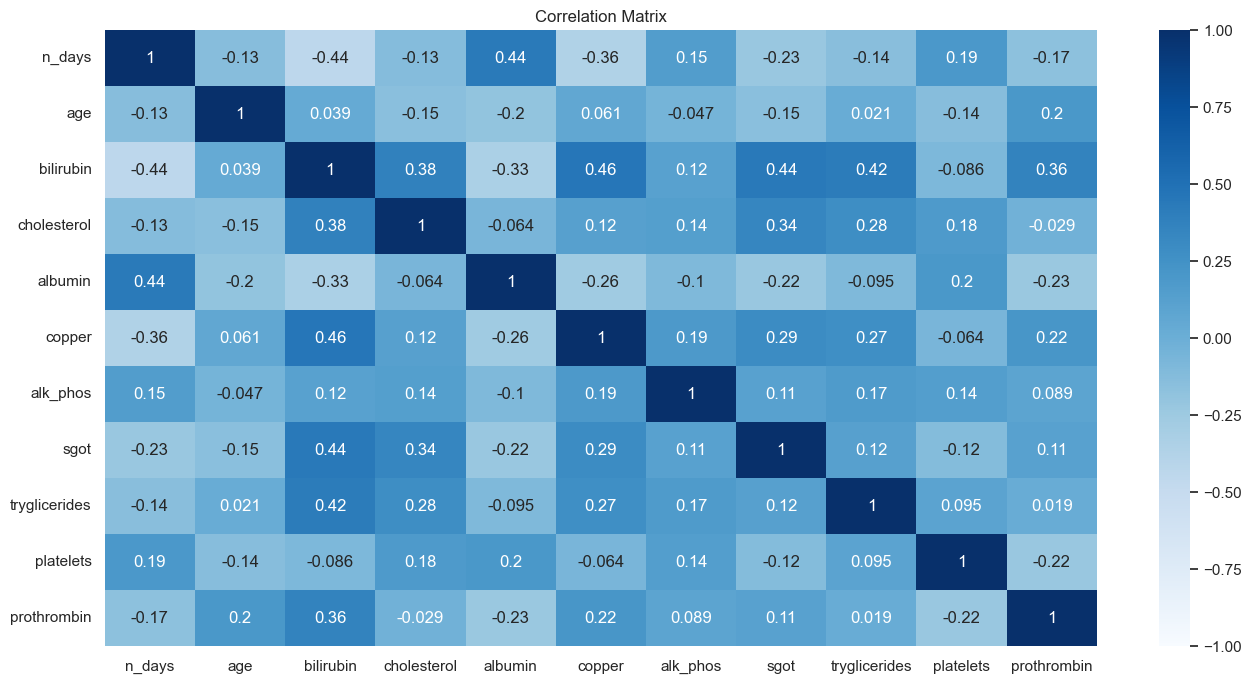

In [93]:
# visualization - heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, annot=True,vmax=1, vmin=-1, cmap="Blues")
plt.title('Correlation Matrix')
plt.show();

### Выводы корелляционного анализа: 

В данных нет высококоррелированных признаков. Однако наблюдается умеренная положительная корреляция между медью и билирубином, билирубином и трансаминазами(SGOT/AST) в сыворотке крови, а также умеренная отрицательная корреляция между альбумином и билирубином в сыворотке крови.

### 2. Категориальные признаки и таргет: crosstab

In [94]:
df.select_dtypes(include=['object']).describe()

,status,drug,sex,ascites,hepatomegaly,spiders,edema,stage
count,312,312,312,312,312,312,312,312
unique,3,2,2,2,2,2,3,4
top,C,D-penicillamine,F,N,Y,N,N,3.0
freq,168,158,276,288,160,222,263,120


#### type of drug D-penicillamine or placebo

In [95]:
df.groupby('status')['drug'].value_counts(normalize=True)

status  drug           
C       Placebo           0.51
        D-penicillamine   0.49
CL      D-penicillamine   0.53
        Placebo           0.47
D       D-penicillamine   0.52
        Placebo           0.48
Name: proportion, dtype: float64

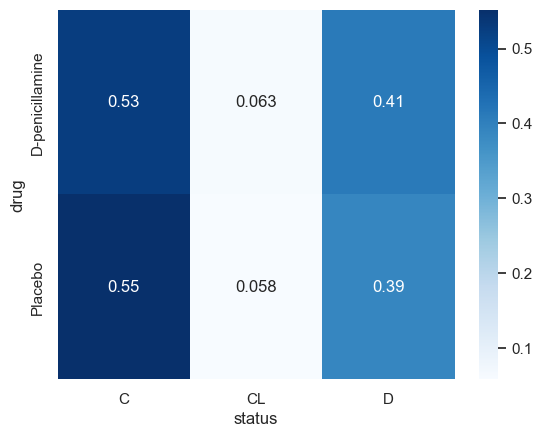

In [96]:
data = pd.crosstab(df['drug'], df['status'], normalize='index')

sns.heatmap(data=data, annot=True, cmap='Blues');

#### Sex M (male) or F (female)

In [97]:
df.groupby('status')['sex'].value_counts(normalize=True)

status  sex
C       F     0.93
        M     0.07
CL      F     0.84
        M     0.16
D       F     0.82
        M     0.18
Name: proportion, dtype: float64

<Axes: xlabel='status', ylabel='sex'>

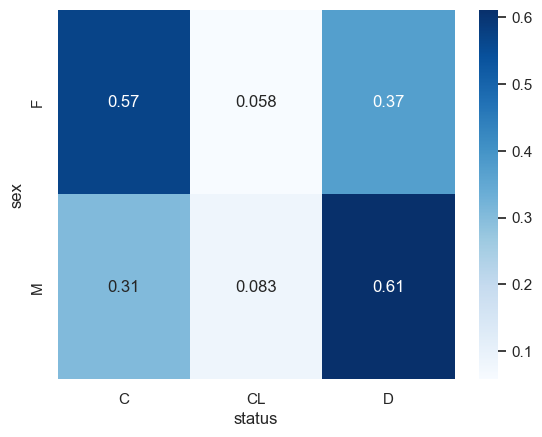

In [98]:
data = pd.crosstab(df['sex'], df['status'], normalize='index')

sns.heatmap(data=data, annot=True,cmap='Blues')

#### Ascites  - presence of ascites N (no) or Y (yes)

In [99]:
df.groupby('status')['ascites'].value_counts(normalize=True)

status  ascites
C       N         0.99
        Y         0.01
CL      N         1.00
D       N         0.82
        Y         0.18
Name: proportion, dtype: float64

<Axes: xlabel='status', ylabel='ascites'>

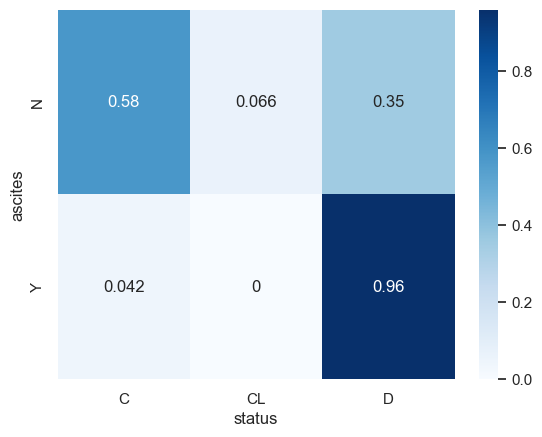

In [100]:
data = pd.crosstab(df['ascites'], df['status'], normalize='index')

sns.heatmap(data=data, annot=True,cmap='Blues')

#### Hepatomegaly  - presence of hepatomegaly N (no) or Y (yes)

In [101]:
df.groupby('status')['hepatomegaly'].value_counts(normalize=True)

status  hepatomegaly
C       N              0.64
        Y              0.36
CL      Y              0.63
        N              0.37
D       Y              0.70
        N              0.30
Name: proportion, dtype: float64

<Axes: xlabel='status', ylabel='hepatomegaly'>

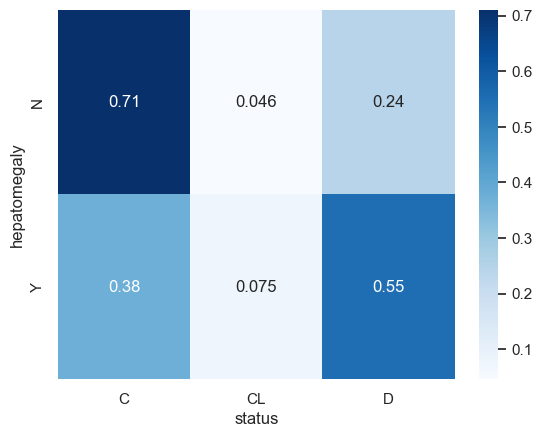

In [102]:
data = pd.crosstab(df['hepatomegaly'], df['status'], normalize='index')

sns.heatmap(data=data, annot=True,cmap='Blues')

####  Spiders - presence of spiders N (no) or Y (yes)

In [103]:
df.groupby('status')['spiders'].value_counts(normalize=True)

status  spiders
C       N         0.80
        Y         0.20
CL      N         0.74
        Y         0.26
D       N         0.58
        Y         0.42
Name: proportion, dtype: float64

<Axes: xlabel='status', ylabel='spiders'>

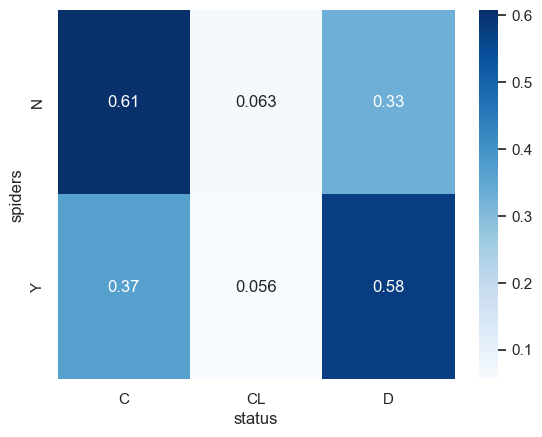

In [104]:
data = pd.crosstab(df['spiders'], df['status'], normalize='index')

sns.heatmap(data=data, annot=True,cmap='Blues')

#### Edema - presence of edema N (no edema), S (edema present without diuretics drug), Y(edema despite diuretic therapy)

In [105]:
df.groupby('status')['edema'].value_counts(normalize=True)

status  edema
C       N       0.93
        S       0.06
        Y       0.01
CL      N       0.89
        S       0.11
D       N       0.71
        Y       0.15
        S       0.14
Name: proportion, dtype: float64

<Axes: xlabel='status', ylabel='edema'>

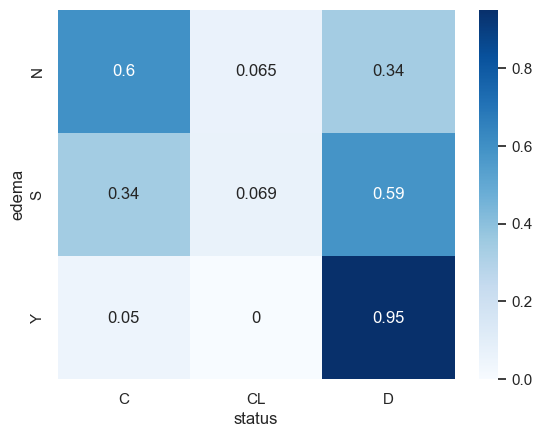

In [106]:
data = pd.crosstab(df['edema'], df['status'], normalize='index')

sns.heatmap(data=data, annot=True,cmap='Blues')

#### Stage - histologic stages of disease (1,2,3, or 4)

In [107]:
df.groupby('status')['stage'].value_counts(normalize=True)

status  stage
C       3.0     0.41
        2.0     0.29
        4.0     0.21
        1.0     0.09
CL      3.0     0.42
        4.0     0.42
        2.0     0.16
D       4.0     0.52
        3.0     0.34
        2.0     0.13
        1.0     0.01
Name: proportion, dtype: float64

<Axes: xlabel='status', ylabel='stage'>

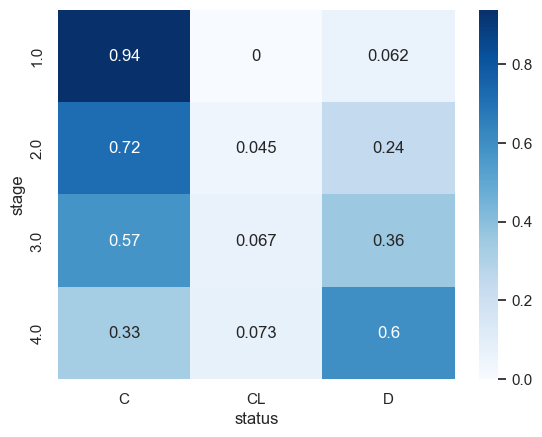

In [108]:
data = pd.crosstab(df['stage'], df['status'], normalize='index')

sns.heatmap(data=data, annot=True,cmap='Blues')

In [27]:
# Для удобства анализа выведем кросс-таблицы в одной ячейке
features = ['drug', 'sex', 'ascites', 'hepatomegaly', 'spiders', 'edema', 'stage']
target = 'status'

# Создаем cross-таблицы для каждого признака
for feature in features:
    crosstab = pd.crosstab(df[feature], df[target])
    print(f"Crosstab of {feature} vs {target}:\n", crosstab, "\n")


Crosstab of drug vs status:
 status            C  CL   D
drug                       
D-penicillamine  83  10  65
Placebo          85   9  60 

Crosstab of sex vs status:
 status    C  CL    D
sex                 
F       157  16  103
M        11   3   22 

Crosstab of ascites vs status:
 status     C  CL    D
ascites              
N        167  19  102
Y          1   0   23 

Crosstab of hepatomegaly vs status:
 status          C  CL   D
hepatomegaly             
N             108   7  37
Y              60  12  88 

Crosstab of spiders vs status:
 status     C  CL   D
spiders             
N        135  14  73
Y         33   5  52 

Crosstab of edema vs status:
 status    C  CL   D
edema              
N       157  17  89
S        10   2  17
Y         1   0  19 

Crosstab of stage vs status:
 status   C  CL   D
stage             
1.0     15   0   1
2.0     48   3  16
3.0     69   8  43
4.0     36   8  65 



In [28]:
df['sex'].value_counts()

sex
F    276
M     36
Name: count, dtype: int64

### Полученные на основании Bivariate Analysis для категориальных признаков выводы:


Из представленных таблиц (crosstab) можно сделать несколько выводов относительно взаимосвязи между различными категориальными признаками и статусом (status):

1. Признак 'drug' (лекарство): Распределение статусов между двумя лекарствами (D-penicillamine и Placebo) довольно сбалансировано.


2. Признак 'sex' (пол): Большинство случаев со статусом C и D приходится на женщин (F), тогда как мужчины (M) представлены в меньшем количестве. Однако, в нашем исследовании изначально пациенты не сбалансированы по полу, представлено 276 женщин и 36 мужчин, поэтому затруднительно корректно верифицировать влияние пола  на  распределение статусов заболевания.


3. Признак 'ascites' (асцит): Большинство пациентов без асцита (N) имеют статус C, в то время как наличие асцита (Y) чаще связано со статусом D.


4. Признак 'hepatomegaly' (гепатомегалия): Наличие гепатомегалии (Y) чаще связано со статусом D, в то время как отсутствие гепатомегалии (N) чаще наблюдается у статусов C.


5. Признак 'spiders' (ангиомы): Наличие ангиом (Y) чаще встречается у статуса D, в то время как их отсутствие (N) чаще связано со статусами C и CL.


6. Признак 'edema' (отеки): Большинство пациентов без отеков (N) имеют статус C, в то время как наличие отеков (S и Y) чаще встречается у статуса D.


7. Признак 'stage' (стадия): Распределение статусов меняется в зависимости от стадии заболевания. Например, стадия 4.0 чаще связана со статусом D.


8. Таким образов появление таких клинических симптомов как асцит, отеки, гепатомегалия, ангиомы как правило связано с прогрессированием заболевания и ассоциировано с высокой летальностью.

## Статистический анализ:

#### Тест Шапиро-Уилка на нормальность распределения количественных признаков

In [110]:
from scipy.stats import shapiro

# Numerical features
numerical_features = ['n_days', 'age', 'bilirubin', 'cholesterol', 'albumin', 'copper', 'alk_phos', 'sgot', 'tryglicerides', 'platelets', 'prothrombin']

normality_results = {}
for feature in numerical_features:
    stat, p = shapiro(df[feature])
    normality_results[feature] = {'Statistic': stat, 'p-value': p}
print("Normality Test Results:")

for feature, result in normality_results.items():
    print(f"{feature}: Statistic = {result['Statistic']}, p-value = {'{:.10f}'.format(result['p-value'])}")

Normality Test Results:
n_days: Statistic = 0.9718755483627319, p-value = 0.0000088365
age: Statistic = 0.9900426864624023, p-value = 0.0321199633
bilirubin: Statistic = 0.6213974952697754, p-value = 0.0000000000
cholesterol: Statistic = 0.6382772922515869, p-value = 0.0000000000
albumin: Statistic = 0.9798900485038757, p-value = 0.0002295194
copper: Statistic = 0.7876502275466919, p-value = 0.0000000000
alk_phos: Statistic = 0.6133084297180176, p-value = 0.0000000000
sgot: Statistic = 0.9117850661277771, p-value = 0.0000000000
tryglicerides: Statistic = 0.810638964176178, p-value = 0.0000000000
platelets: Statistic = 0.9879273772239685, p-value = 0.0106242001
prothrombin: Statistic = 0.8851124048233032, p-value = 0.0000000000


####  Таким образом, учитывая, что количественные признаки имеют ненормальное распределение, выборки являются независимыми, количество групп для сравнения больше 2х, следует использовать непараметрические статистические критерии, такие как Kruskal-Wallis Test.



Нулевая гипотеза (H0): Медианы всех групп одинаковы. Это означает, что нет статистически значимых различий между медианами независимых групп.

Альтернативная гипотеза (H1): По крайней мере одна группа имеет медиану, отличающуюся от медиан других групп. Это предполагает наличие статистически значимых различий между медианами хотя бы двух групп.

Тест Краскела-Уоллиса не уточняет, между какими именно группами существуют различия; он лишь указывает на наличие различий в целом. Если альтернативная гипотеза подтверждается (т.е., если тест показывает статистически значимые различия), для выявления конкретных групп с различиями обычно применяются дополнительные тесты.

In [114]:
numerical_features = ['n_days', 'age', 'bilirubin', 'cholesterol', 'albumin', 'copper', 'alk_phos', 'sgot', 'tryglicerides', 'platelets', 'prothrombin']
from scipy.stats import kruskal

# Kruskal-Wallis Test for Numerical Features
kruskal_results = {}
for feature in numerical_features:
    # Splitting the data based on the 'status' categories
    groups = [group[feature].dropna() for name, group in df.groupby('status')]

    stat, p = kruskal(*groups)
    kruskal_results[feature] = {'Statistic': stat, 'p-value': p}


print("Kruskal-Wallis Test Results:")
for feature, result in kruskal_results.items():
    print(f"{feature}: Statistic = {result['Statistic']}, p-value = {'{:.10f}'.format(result['p-value'])}")

Kruskal-Wallis Test Results:
n_days: Statistic = 63.67708203552611, p-value = 0.0000000000
age: Statistic = 28.788855704494377, p-value = 0.0000005605
bilirubin: Statistic = 94.19164663127837, p-value = 0.0000000000
cholesterol: Statistic = 11.293086811429138, p-value = 0.0035296964
albumin: Statistic = 25.525491498089032, p-value = 0.0000028656
copper: Statistic = 62.38929126945772, p-value = 0.0000000000
alk_phos: Statistic = 22.76581838914488, p-value = 0.0000113885
sgot: Statistic = 35.26611736686324, p-value = 0.0000000220
tryglicerides: Statistic = 10.39218980543035, p-value = 0.0055381493
platelets: Statistic = 12.88623640395473, p-value = 0.0015914365
prothrombin: Statistic = 64.57979503362371, p-value = 0.0000000000


###  Вывод:

все представленные числовые признаки имеют статистически значимые различия между группами. Это указывает на то, что эти признаки могут играть важную роль в определении статуса пациентов в контексте данного исследования. 

####  Chi-Square Test for Categorical Features: учитывая наличие категориальных признаков, независимые выборки можно воспользоваться Chi-Square Test 

Нулевая гипотеза (H0): Категориальные переменные независимы друг от друга. Это означает, что распределение одной переменной не зависит от распределения другой переменной.

Альтернативная гипотеза (H1 ): Категориальные переменные зависимы. Это означает, что распределение одной переменной зависит от распределения другой переменной.

In [116]:
categorical_features = ['drug', 'sex', 'ascites', 'hepatomegaly', 'spiders', 'edema', 'stage']
from scipy.stats import chi2_contingency

# Chi-Square Test for Categorical Features
chi_square_results = {}
for feature in categorical_features:
    crosstab = pd.crosstab(df[feature], df['status'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi_square_results[feature] = {'Chi2': chi2, 'p-value': p}

In [117]:
for feature, result in chi_square_results.items():
    print(f"{feature}: Chi2 = {result['Chi2']}, p-value = {'{:.10f}'.format(result['p-value'])}")

drug: Chi2 = 0.22519606594984942, p-value = 0.8935097494
sex: Chi2 = 8.935702589807851, p-value = 0.0114719392
ascites: Chi2 = 33.684496031746036, p-value = 0.0000000485
hepatomegaly: Chi2 = 35.656389711119914, p-value = 0.0000000181
spiders: Chi2 = 16.898264905507013, p-value = 0.0002140861
edema: Chi2 = 33.96308167442338, p-value = 0.0000007583
stage: Chi2 = 39.249217753029704, p-value = 0.0000006396


### Вывод: 

Признак - [drug] : Chi2 = 0.225, p-значение = 0.8935 не отклоняем нулевую гипотезу. Это означает, что нет статистически значимой связи между типом лекарства и статусом пациента.
Все остальные категориальные признаки имеют p-value < 0.05 , мы отклоняем нулевую гипотезу, соответственно существует статистически значимая разница между признаками. Тест хи-квадрат позволяет определить, есть ли статистически значимая связь между категориальными переменными, но он не предоставляет прямой информации о степени влияния одного признака на другой.

## 3.  Multiclass prediction:

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [119]:
# преобразованиt категориальных данных в числовые значения
from sklearn.preprocessing import LabelEncoder

cols = ['drug', 'sex', 'ascites', 'hepatomegaly', 'spiders', 'edema', 'stage']
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [120]:
X = df.drop(['status'], axis = 1)
y = df['status']

In [121]:
# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
# сплит на тренировочную и тестовую выборки 80-20 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (249, 18)
y_train: (249,)
X_test: (63, 18)
y_test: (63,)


In [127]:
# обучаем logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [128]:
# делаем предсказание
y_pred = model.predict(X_test)

In [129]:
# Оценка качества модели
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           C       0.70      0.90      0.79        29
          CL       0.00      0.00      0.00         8
           D       0.77      0.77      0.77        26

    accuracy                           0.73        63
   macro avg       0.49      0.56      0.52        63
weighted avg       0.64      0.73      0.68        63

Confusion Matrix:
 [[26  0  3]
 [ 5  0  3]
 [ 6  0 20]]


### Оценка качества  модели:
Модель была протестирована на 63 наблюдениях и показала следующие результаты:
1. Class 'C':

   Precision: 0.70. Из всех случаев, предсказанных как 'C', 70% были правильными. 


   Recall: 0.90. Модель правильно идентифицировала 90% всех реальных случаев 'C'.


   F1-Score: 0.79. A balanced measure between precision and recall for the 'C' class.
   


2.  Class 'CL':

    Precision: 0.00. Модель не смогла правильно идентифицировать ни одного случая 'CL'.

    Recall: 0.00. Все реальные случаи 'CL' были пропущены.

    F1-Score: 0.00. Указывает на плохую производительность для класса 'CL'.


3. Class 'D':


   Precision: 0.77. Из всех случаев, предсказанных как 'D', 77% были правильными.

   Recall: 0.77.Модель правильно идентифицировала 77% всех реальных случаев 

   F1-Score: 0.77. Good balance between precision and recall for the 'D' class.

4. Overall Accuracy: 0.73. Модель правильно предсказала 73% всех случаев.


5. Confusion Matrix 

   Class 'C' : 26 наблюдений правильно классифицированы как 'C', 3 неправильно классифицированы как 'D'.

   Class 'CL' : 5 наблюдений неправильно классифицированы как 'C', 3 как 'D'. Нет правильных предсказаний для 'CL'.

   Class 'D' : 6 наблюдений неправильно классифицированы как 'C', 20 правильно классифицированы как 'D'.

6. Analysis : Модель хорошо справляется с классификацией 'C' и 'D', но испытывает трудности с классом 'CL'. Плохая производительность для 'CL' вероятно связана с дисбалансом классов в данных, недостаточным объемом обучающих данных для 'CL'.
